In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
%matplotlib inline

/Users/svalleco/Library/Python/2.7/lib/python/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from EcalEnergyGan import generator as build_generator

Using TensorFlow backend.


In [3]:
n_events = 100
latent_space = 200
gen_weights='params_generator_epoch_041.hdf5'
outfile_name = 'generation.hdf5'

In [4]:
#initialise model and load weights configuration
np.random.seed()
g = build_generator(latent_space, return_intermediate=False)
g.load_weights(gen_weights)

EcalEnergyGan.py:71: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(64, (6, 6, 8), padding="same", kernel_initializer="he_uniform")`
  Conv3D(64, 6, 6, 8, border_mode='same', init='he_uniform'),
EcalEnergyGan.py:77: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(6, (6, 5, 8), kernel_initializer="he_uniform")`
  Conv3D(6, 6, 5, 8, init='he_uniform'),
EcalEnergyGan.py:83: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(6, (3, 3, 8), kernel_initializer="he_uniform")`
  Conv3D(6, 3, 3, 8, init='he_uniform'),
EcalEnergyGan.py:85: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(1, (2, 2, 2), use_bias=False, kernel_initializer="glorot_normal")`
  Conv3D(1, 2, 2, 2, bias=False, init='glorot_normal'),


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 25, 25, 25, 1)     872948    
Total params: 872,948
Trainable params: 872,808
Non-trainable params: 140
_________________________________________________________________


EcalEnergyGan.py:93: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("se..., inputs=[<tf.Tenso...)`
  Model(input=[latent], output=fake_image).summary()
EcalEnergyGan.py:94: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("se..., inputs=[<tf.Tenso...)`
  return Model(input=[latent], output=fake_image)


In [5]:
#initialise random latent space
noise = np.random.normal(0, 1, (n_events, latent_space))
#sample primary electron energies from uniform random distribution between 100-500 GeV
sampled_energies = np.random.uniform(1, 5, (n_events, 1))
# n_events primary electrons with 100 GeV:
#sampled_energies = np.ones(n_events, 1))
generator_ip = np.multiply(sampled_energies, noise)

In [6]:
#generate images
generated_images = g.predict(generator_ip, verbose=False, batch_size=128)
print(generated_images.shape)

(100, 25, 25, 25, 1)


In [7]:
#squeeze out unnecessary dimensions and store file
generated_images = np.squeeze(generated_images)

with h5py.File(outfile_name,'w') as outfile:
    outfile.create_dataset('ECAL',data=generated_images)

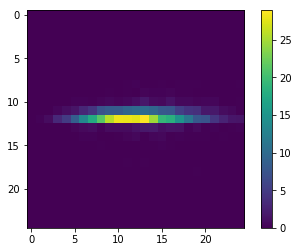

In [8]:
#visualise longitudinal shower for 1 event (at the center of the x axis)
plt.imshow(generated_images[10, :, 12, :])
plt.colorbar()

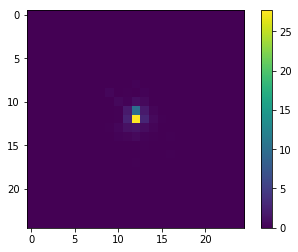

In [9]:
#visualise transverse shower for 1 event (at the center of the z axis)
plt.imshow(generated_images[10, :, :, 12])
plt.colorbar()

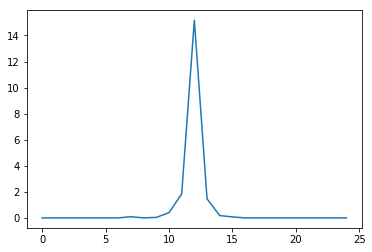

In [15]:
#transverse shower profile 
plt.plot(generated_images[0, :, 12, 12])
plt.show()

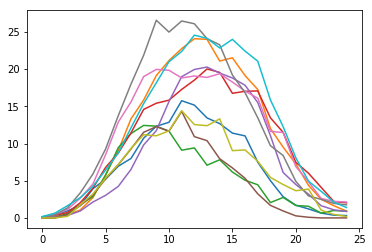

In [11]:
#longitudinale shower profiles for 10 events
for i in range(10):
    plt.plot(generated_images[i, 12, 12, :])